# Top

Udacity course: Machine Learning for Trading.

https://classroom.udacity.com/courses/ud501

In [1]:
# Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Custom
import finance_utils as fu
#import ystockquote as ysq
#import technical_indicators as ti
import stock_db_mgr as sdm

In [2]:
# Adjust figure size to be bigger:
plt.rcParams['figure.figsize'] = [15, 6]

# Set seaborn plot theme:
sns.set_theme()

In [3]:
# Reset random number for repeatability
np.random.seed(0)

Note: before lesson 7, refer to udacity.py

# Lesson 7

In [4]:
db = sdm.StockDBMgr('stock_db/test', '2010-01-01')

In [5]:
df = db.get_all_symbol_single_data_item('Close')

In [6]:
df.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,6.526019,109.800003,15.610239,82.284225,88.860397,42.336411
2010-01-05,6.537303,109.699997,15.541497,81.290222,89.095604,42.501709
2010-01-06,6.433318,111.510002,15.149715,80.762177,89.158340,42.869057
2010-01-07,6.421425,110.820000,14.797037,80.482620,89.534714,42.734367
2010-01-08,6.464118,111.370003,14.994298,81.290222,89.832649,42.562931


In [7]:
# Get daily returns (pc = percent)
pc = df.pct_change()
pc.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.000911,-0.004404,-0.012080,0.002647,0.003904
2010-01-06,-0.015906,0.016500,-0.025209,-0.006496,0.000704,0.008643
2010-01-07,-0.001849,-0.006188,-0.023280,-0.003461,0.004221,-0.003142
2010-01-08,0.006649,0.004963,0.013331,0.010034,0.003328,-0.004012


In [8]:
# To not have na for first value.
pc.iloc[0] = 0.0

In [9]:
pc.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.001729,-0.000911,-0.004404,-0.012080,0.002647,0.003904
2010-01-06,-0.015906,0.016500,-0.025209,-0.006496,0.000704,0.008643
2010-01-07,-0.001849,-0.006188,-0.023280,-0.003461,0.004221,-0.003142
2010-01-08,0.006649,0.004963,0.013331,0.010034,0.003328,-0.004012


## Histogram

<AxesSubplot:>

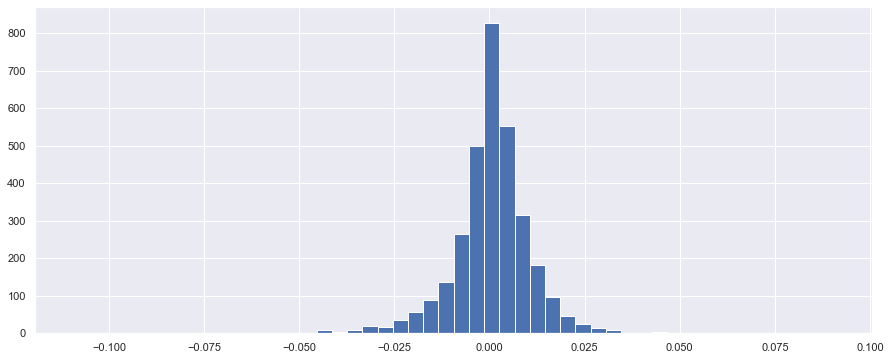

In [10]:
# Basic histogram
pc['SPY'].hist(bins=50)

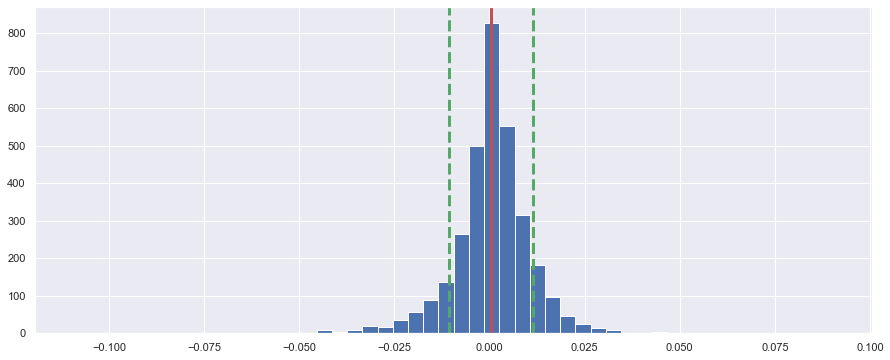

In [11]:
# With std & mean
# TBD bug in lesson: missing std +/- mean.
pc['SPY'].hist(bins=50)
plt.axvline(pc['SPY'].mean(), color='r', linewidth=3)
plt.axvline(pc['SPY'].mean() - pc['SPY'].std(), color='g', linewidth=3, linestyle='dashed')
plt.axvline(pc['SPY'].mean() + pc['SPY'].std(), color='g', linewidth=3, linestyle='dashed')

In [12]:
def plot_histogram(s, bins=50):
    s.hist(bins=bins)
    plt.axvline(s.mean(), color='r', linewidth=3)
    plt.axvline(s.mean() - s.std(), color='g', linewidth=3, linestyle='dashed')
    plt.axvline(s.mean() + s.std(), color='g', linewidth=3, linestyle='dashed')

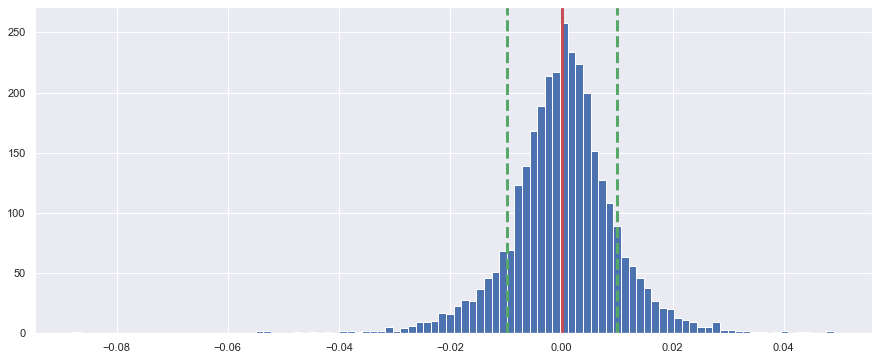

In [13]:
plot_histogram(pc['GLD'], 100)

## Statistical info

Statistics moment:
1. mean
2. std dev
3. skewness:
    * negative skew indicates that the tail is on the left side of the distribution
    * positive skew indicates that the tail is on the right
4. kurtosis: how the tails are thick
    * A distribution with positive excess kurtosis is called leptokurtic, and has fatter tails
    * A distribution with negative excess kurtosis is called platykurtic, and has thinner tails

In [14]:
desc = df.pct_change().describe()
desc.rename_axis('Symbol', axis=1, inplace=True)
desc.rename_axis('Parameter', axis=0, inplace=True)
desc

Symbol,AAPL,GLD,GOOG,IBM,SPY,XOM
Parameter,,,,,,
count,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000
mean,0.001145,0.000151,0.000701,0.000262,0.000516,0.000420
std,0.017986,0.009866,0.016898,0.014199,0.011035,0.015955
min,-0.128647,-0.087808,-0.111008,-0.128507,-0.109424,-0.122248
25%,-0.007419,-0.004876,-0.006823,-0.006230,-0.003709,-0.006898
50%,0.000942,0.000421,0.000683,0.000436,0.000669,0.000124
75%,0.010667,0.005360,0.008865,0.007051,0.005699,0.007789
max,0.119808,0.049038,0.160524,0.113011,0.090604,0.126868


In [15]:
# Add more info
desc.loc['skew'] = pc.skew()
desc.loc['kurt'] = pc.kurtosis()
desc

Symbol,AAPL,GLD,GOOG,IBM,SPY,XOM
Parameter,,,,,,
count,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000
mean,0.001145,0.000151,0.000701,0.000262,0.000516,0.000420
std,0.017986,0.009866,0.016898,0.014199,0.011035,0.015955
min,-0.128647,-0.087808,-0.111008,-0.128507,-0.109424,-0.122248
25%,-0.007419,-0.004876,-0.006823,-0.006230,-0.003709,-0.006898
50%,0.000942,0.000421,0.000683,0.000436,0.000669,0.000124
75%,0.010667,0.005360,0.008865,0.007051,0.005699,0.007789
max,0.119808,0.049038,0.160524,0.113011,0.090604,0.126868
skew,-0.090389,-0.459778,0.450146,-0.494043,-0.569001,0.059733


In [16]:
def get_stat_info(s):
    return {
        'min' : s.min(),
        'max' : s.max(),
        'mean': s.mean(),
        'std' : s.std(),
        'skew': s.skew(),
        'kurt': s.kurt()
    }

## Scatterplots

In [17]:
pc.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.001729,-0.000911,-0.004404,-0.012080,0.002647,0.003904
2010-01-06,-0.015906,0.016500,-0.025209,-0.006496,0.000704,0.008643
2010-01-07,-0.001849,-0.006188,-0.023280,-0.003461,0.004221,-0.003142
2010-01-08,0.006649,0.004963,0.013331,0.010034,0.003328,-0.004012


Notes:
* Slope is Beta
* Offset is Alpha
* Slope is NOT correlation
* Correlation is how tight the points are to the line fitting

<AxesSubplot:xlabel='SPY', ylabel='IBM'>

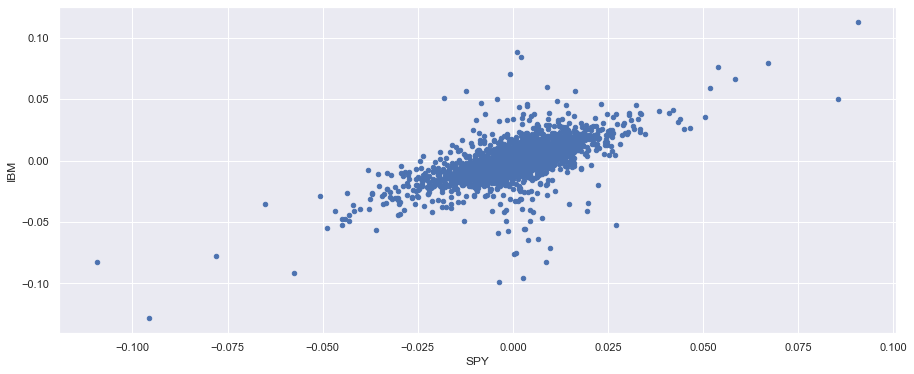

In [18]:
# Strangely, without color argument, we get a warning
pc.plot(x='SPY', y='IBM', kind='scatter', color='b')

<AxesSubplot:xlabel='SPY', ylabel='GLD'>

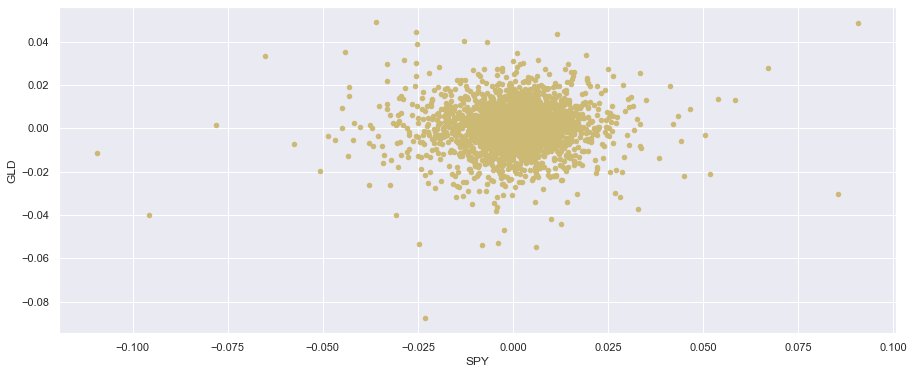

In [19]:
pc.plot(x='SPY', y='GLD', kind='scatter', color='y')

### Regression line

In [20]:
beta, alpha = np.polyfit(pc['SPY'], pc['IBM'], 1)

In [21]:
(beta, alpha)

(0.8453785139713713, -0.0001741392211413792)

In [22]:
pc['SPY'].min(), pc['SPY'].max()

(-0.10942379087121723, 0.09060360911525045)

In [23]:
x = np.linspace(pc['SPY'].min(), pc['SPY'].max(), 10)

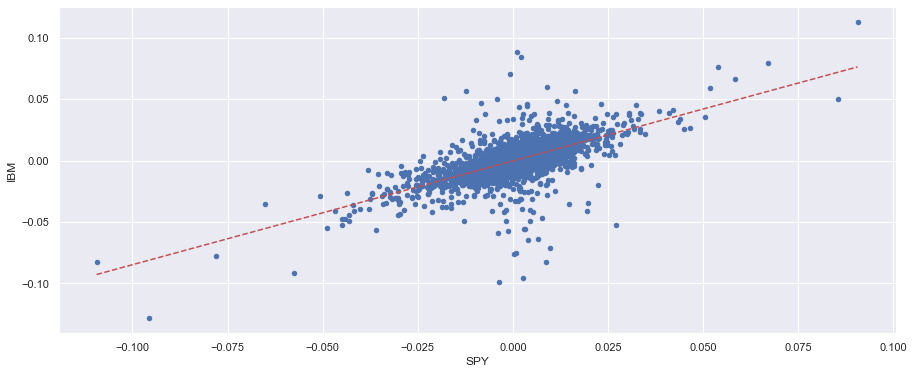

In [24]:
pc.plot(x='SPY', y='IBM', kind='scatter', color='b')
plt.plot(x, x * beta + alpha, linestyle='--', color='r')

In [25]:
def plot_correlation(df, s1, s2):
    beta, alpha = np.polyfit(df[s1], df[s2], 1)
    x = np.linspace(df[s1].min(), df[s1].max(), 20)
    df.plot(x=s1, y=s2, kind='scatter', color='b')
    plt.plot(x, x * beta + alpha, linestyle='--', color='r')
    return (beta, alpha)    

(0.9229705648065096, -5.616888347864087e-05)

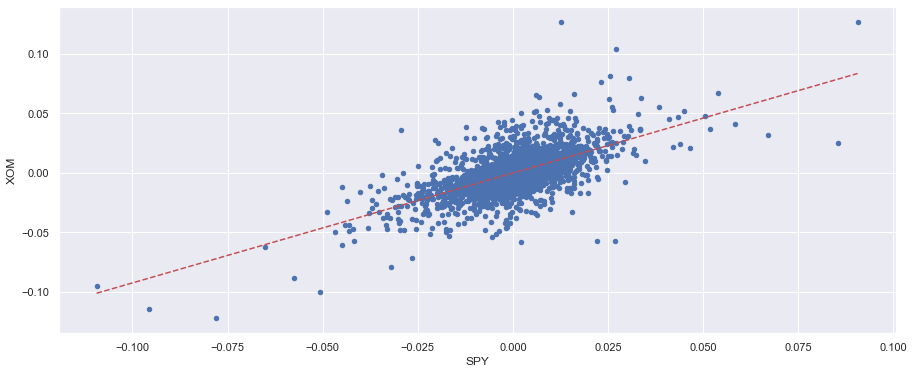

In [26]:
plot_correlation(pc, 'SPY', 'XOM')

(0.03192531321178373, 0.00013458778852925958)

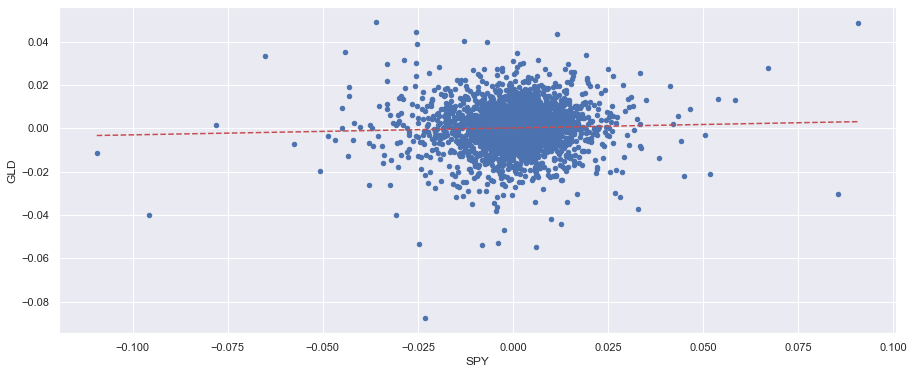

In [27]:
plot_correlation(pc, 'SPY', 'GLD')

## Correlation

In [28]:
pc.corr()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Close,,,,,,
AAPL,1.000000,0.045945,0.554343,0.409693,0.683187,0.330524
GLD,0.045945,1.000000,0.008027,0.018253,0.035708,0.057964
GOOG,0.554343,0.008027,1.000000,0.420023,0.700545,0.368080
IBM,0.409693,0.018253,0.420023,1.000000,0.656995,0.509181
SPY,0.683187,0.035708,0.700545,0.656995,1.000000,0.638358
XOM,0.330524,0.057964,0.368080,0.509181,0.638358,1.000000


In [29]:
pc.corr().min()

Close
AAPL    0.045945
GLD     0.008027
GOOG    0.008027
IBM     0.018253
SPY     0.035708
XOM     0.057964
dtype: float64

In [30]:
pc.corr().idxmin()

Close
AAPL     GLD
GLD     GOOG
GOOG     GLD
IBM      GLD
SPY      GLD
XOM      GLD
dtype: object

## My experimentations

### Is it normal distribution?

In [31]:
pc.iloc[0]

Close
AAPL    0.0
GLD     0.0
GOOG    0.0
IBM     0.0
SPY     0.0
XOM     0.0
Name: 2010-01-04 00:00:00, dtype: float64

In [32]:
r = pd.Series(np.random.randn(len(pc['SPY'])))
# 0 mean
r = r - r.mean()
# same std
r = r / r.std() * pc['SPY'].std()
# put back same mean
r = r + pc['SPY'].mean()
# same starting value
r[0] = 0.0

In [33]:
get_stat_info(r)

{'min': -0.03443997114883359,
 'max': 0.043963204341649575,
 'mean': 0.0005090615393128843,
 'std': 0.011027625204505015,
 'skew': 0.04735603312042669,
 'kurt': -0.03796174611409331}

In [34]:
get_stat_info(pc['SPY'])

{'min': -0.10942379087121723,
 'max': 0.09060360911525045,
 'mean': 0.0005155255476767254,
 'std': 0.011033442484922613,
 'skew': -0.5690006433205911,
 'kurt': 11.057964374315828}

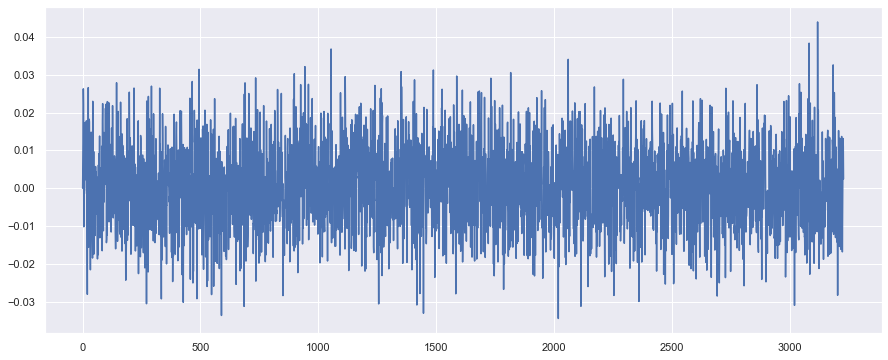

In [35]:
plt.plot(r)

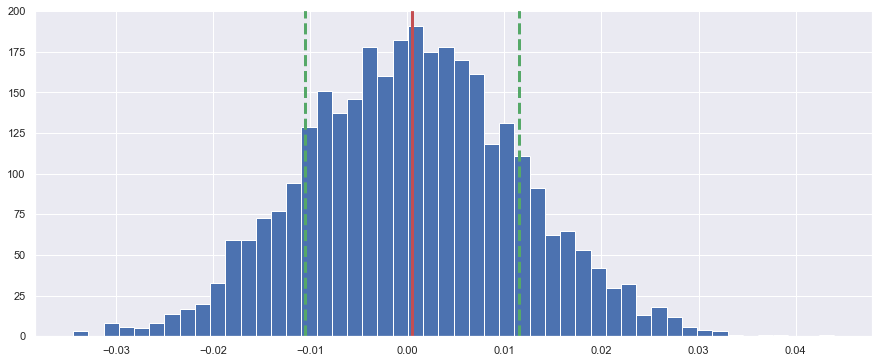

In [36]:
plot_histogram(r)

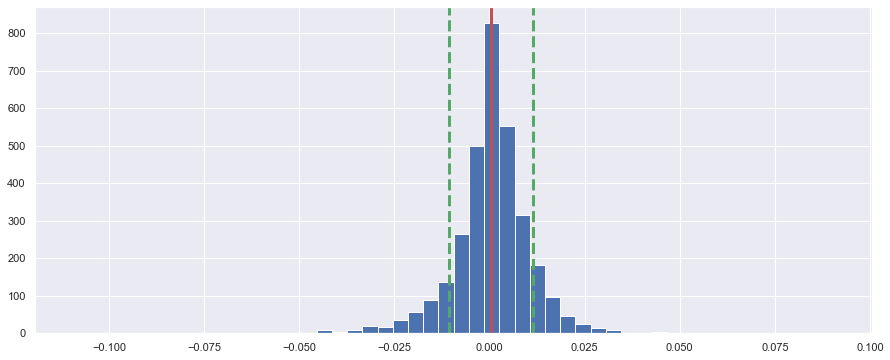

In [37]:
plot_histogram(pc['SPY'])

In [38]:
df['SPY'].iloc[0]

88.86039699999999

<AxesSubplot:>

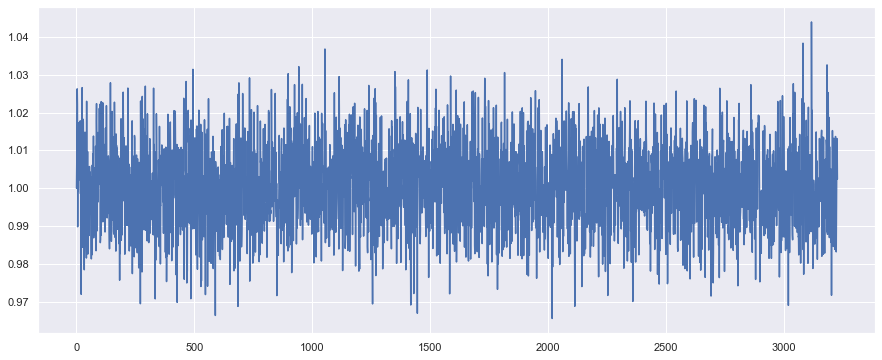

In [39]:
(r + 1).plot()

In [40]:
(r + 1).cumprod()

0       1.000000
1       1.005416
2       1.017454
3       1.044188
4       1.067208
          ...   
3224    4.112950
3225    4.140882
3226    4.195256
3227    4.241237
3228    4.251611
Length: 3229, dtype: float64

In [41]:
(pc['SPY'] + 1).cumprod()

Date
2010-01-04    1.000000
2010-01-05    1.002647
2010-01-06    1.003353
2010-01-07    1.007588
2010-01-08    1.010941
                ...   
2022-10-24    4.263654
2022-10-25    4.331739
2022-10-26    4.299103
2022-10-27    4.276146
2022-10-28    4.335902
Name: SPY, Length: 3229, dtype: float64

<AxesSubplot:xlabel='Date'>

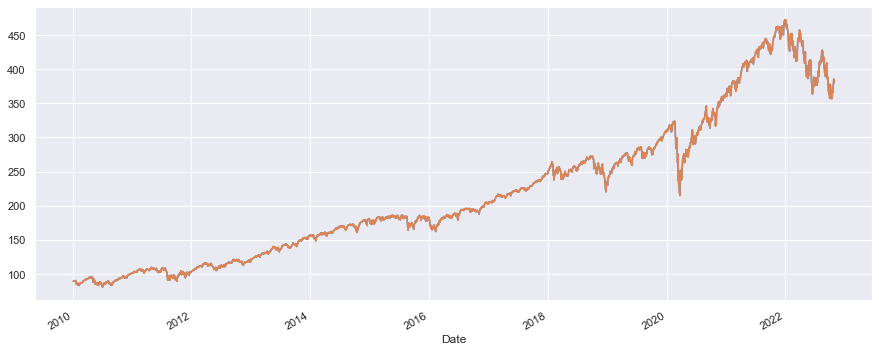

In [42]:
# Same chart reconstruction from % change
((pc['SPY'] + 1).cumprod() * df['SPY'].iloc[0]).plot()
df['SPY'].plot()

<AxesSubplot:>

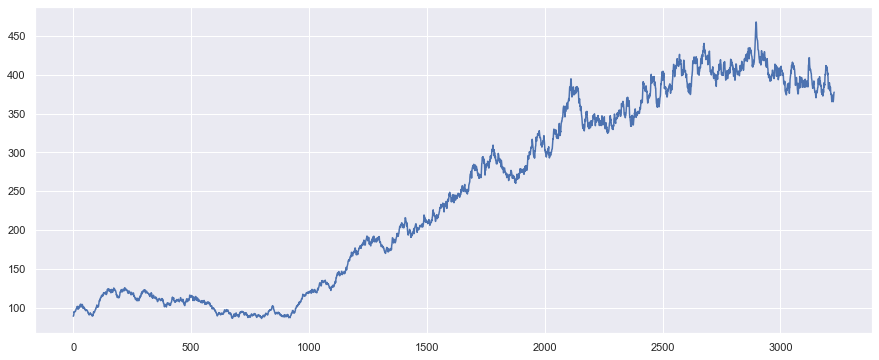

In [43]:
((r + 1).cumprod() * df['SPY'].iloc[0]).plot()

### Is it random walk?

TBD move to tradesim notebook.

(0.0, 300.0)

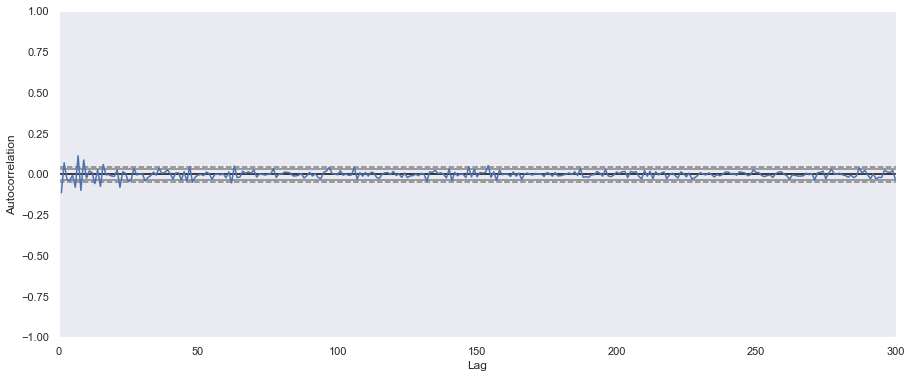

In [44]:
pd.plotting.autocorrelation_plot(pc['SPY']).set_xlim([0, 300])

(0.0, 300.0)

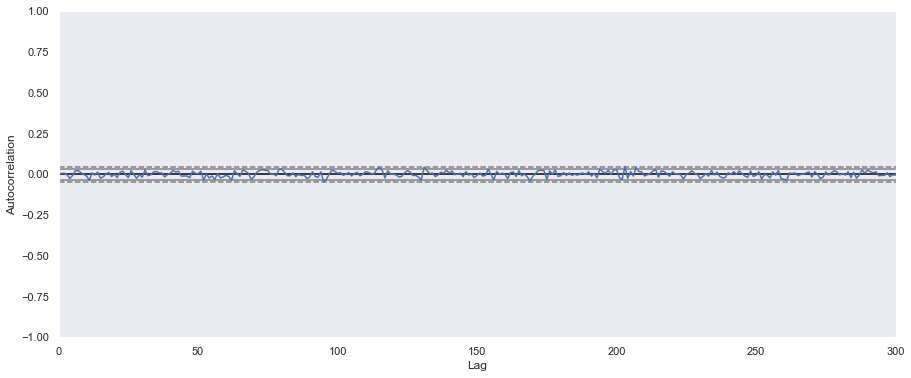

In [45]:
pd.plotting.autocorrelation_plot(r).set_xlim([0, 300])

# Lesson 8

In [46]:
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
allocs = np.array([.4, .4, .1, .1])
start_val = 1000 # $
allocs.sum()

1.0

In [47]:
# Keep only the stocks we want:
df = df[symbols]

In [48]:
df.isna().any(1).any()

False

In [49]:
df.head()

Close,SPY,XOM,GOOG,GLD
Date,,,,
2010-01-04,88.860397,42.336411,15.610239,109.800003
2010-01-05,89.095604,42.501709,15.541497,109.699997
2010-01-06,89.158340,42.869057,15.149715,111.510002
2010-01-07,89.534714,42.734367,14.797037,110.820000
2010-01-08,89.832649,42.562931,14.994298,111.370003


## Portfolio value

<AxesSubplot:xlabel='Date'>

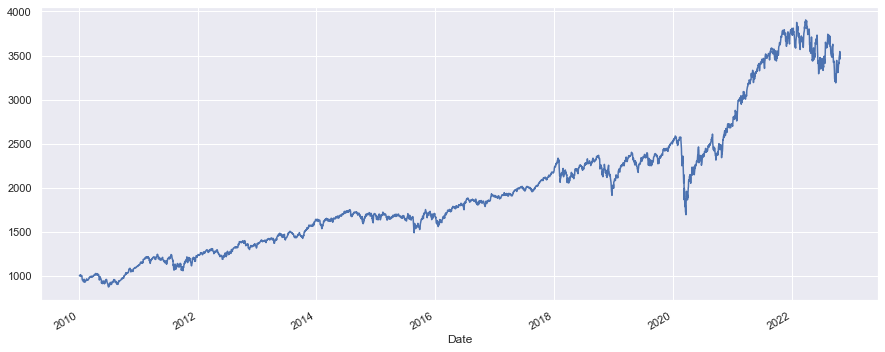

In [50]:
# Quick plot of our portfolio
port_val = ((df / df.iloc[0]) * allocs * start_val).sum(1)
port_val.plot()

## Daily returns

In [51]:
daily_rets = port_val.pct_change().iloc[1:]

<AxesSubplot:xlabel='Date'>

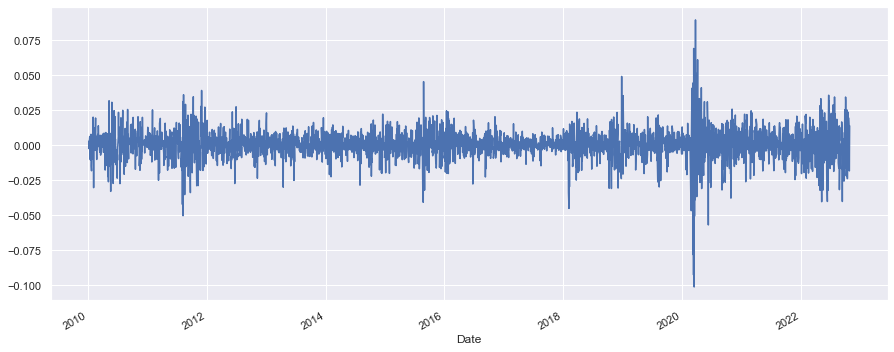

In [52]:
daily_rets.plot()

## Cumulative returns

In [53]:
(port_val[-1] / port_val[0]) - 1

2.508564658118602

## Average daily returns

In [54]:
daily_rets.mean()

0.0004461200506984586

## Std dev daily returns

Also referred as risk.

In [55]:
daily_rets.std()

0.010675605524243553

## Sharpe ratio

Risk-free rate: approximated as zero.  Could vary depending on economic situation.

In [56]:
(daily_rets - 0).mean() / (daily_rets - 0).std()

0.04178873504508491

Note: there is 252 trading days per year.

In [57]:
len(df.loc['2010-01-01':'2010-12-31'])

252

In [58]:
np.sqrt(252)

15.874507866387544

k = sqrt(nb samples per years)

In [59]:
np.sqrt(252) * ((daily_rets - 0).mean() / (daily_rets - 0).std())

0.6633756031995852

In [60]:
# Test
np.sqrt(252) * (10./100/100 - 2./100/100) / (10./100/100)

12.699606293110037

## Combined

Function to get
* Cummulative return
* Average daily return
* Risk
* Sharpe ratio

In [61]:
def portfolio_param(port_val, nb_trading_day_per_year=252, risk_free_rate_of_return=0):
    daily_rets = port_val.pct_change()
    daily_rets.iloc[0] = 0

    daily_rf = np.power(1.0 + risk_free_rate_of_return, 1.0/nb_trading_day_per_year) - 1
    
    return {
        'Cummulative return': (port_val.iloc[-1] / port_val.iloc[0]) - 1,
        'Average daily return': daily_rets.mean(),
        'Risk': daily_rets.std(),
        'Sharpe ratio': np.sqrt(nb_trading_day_per_year) * ((daily_rets - daily_rf).mean() / (daily_rets - daily_rf).std())
    }

In [62]:
portfolio_param(port_val)

{'Cummulative return': 2.508564658118602,
 'Average daily return': 0.00044598189026157455,
 'Risk': 0.010673954688966977,
 'Sharpe ratio': 0.6632727261379191}

# Trades test

TBD move to tradesim notebook...

<AxesSubplot:xlabel='Date'>

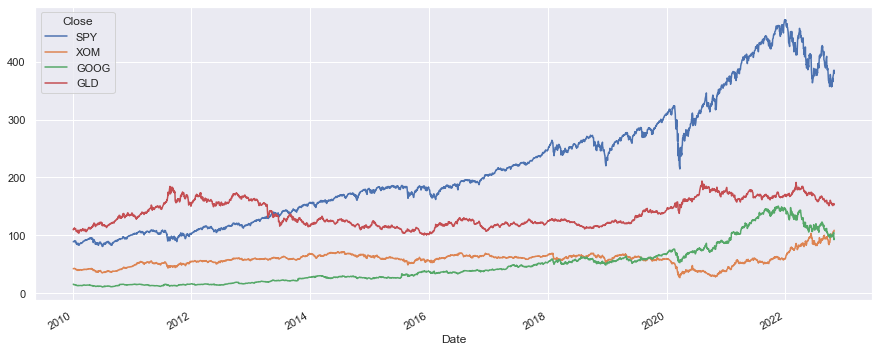

In [63]:
df.plot()

<AxesSubplot:xlabel='Date'>

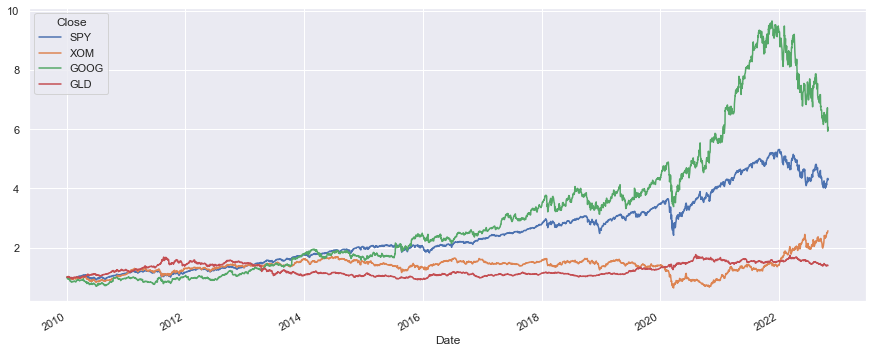

In [64]:
fu.normalize_data_frame(df).plot()

<AxesSubplot:xlabel='Date'>

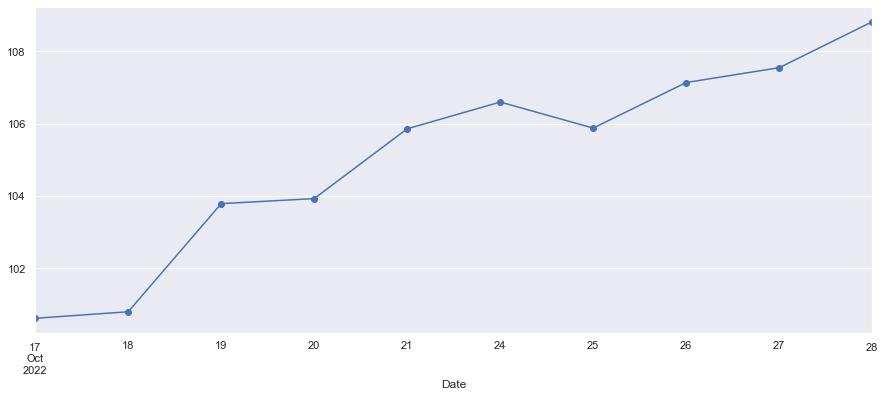

In [65]:
n = 10
df2 = df.iloc[-n:].loc[:, 'XOM']
df2.plot(marker='o')

In [66]:
df2.iloc[0]

100.620003

In [67]:
df2.iloc[-1]

108.82

In [68]:
(df2.iloc[-1] - df2.iloc[0]) / df2.iloc[0]

0.08149470041260083

In [69]:
df2.iloc[-1] / df2.iloc[0] - 1

0.08149470041260076

<AxesSubplot:xlabel='Date'>

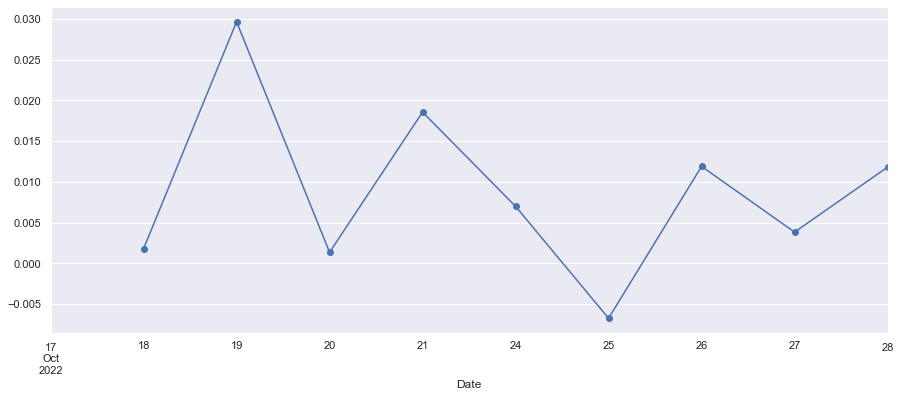

In [70]:
df2.pct_change().plot(marker='o')

In [71]:
(df2.pct_change() + 1).prod() - 1

0.08149470041260098

In [72]:
(df2.pct_change()[df2.pct_change() > 0] + 1).prod() - 1

0.08884903822762524

In [73]:
s = pd.Series([12, 10, 15, 13, 16], list('abcde'))
s

a    12
b    10
c    15
d    13
e    16
dtype: int64

<AxesSubplot:>

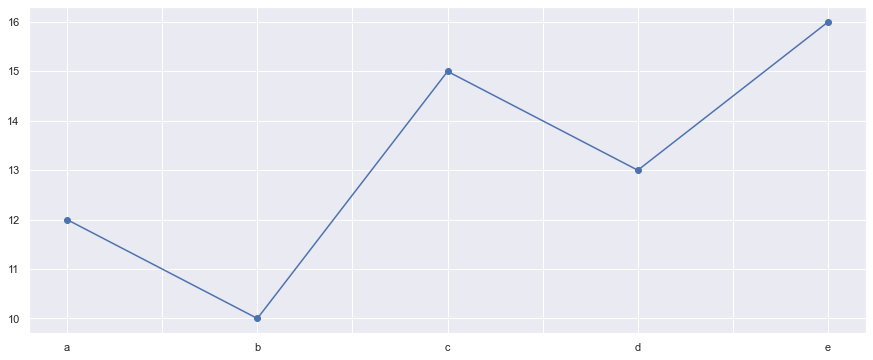

In [74]:
s.plot(marker='o')

In [75]:
s['e']/s['a']

1.3333333333333333

In [76]:
15/10. * 16 /13.

1.8461538461538463

In [77]:
(s.pct_change()[s.pct_change() > 0] + 1).prod() - 1

0.8461538461538463

In [78]:
# Real value
s = df.loc[:, 'GLD']

<AxesSubplot:xlabel='Date'>

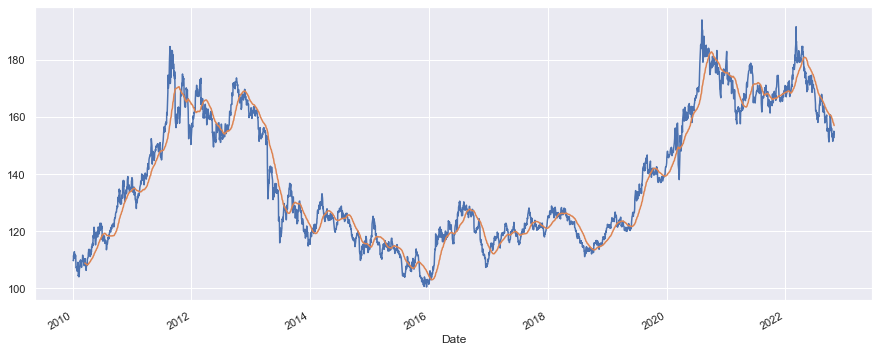

In [79]:
s.plot()
s.rolling(50).mean().plot()

In [80]:
# Buy and hold gain:
s[-1] / s[0] - 1

0.391165717909862

In [81]:
# If only trading positive days (theorical max cumulative return):
(s.pct_change()[s.pct_change() > 0] + 1).prod() - 1

105477.01191692903

# Lesson 9

## Minimizer

In [82]:
def f(x):
    y = (x - 1.5) ** 2 + 0.5
    #print("x = %f, y = %f" % (x, y))  # Temp to debug minimizer
    return y

In [83]:
f(2.0)

0.75

In [84]:
x = np.linspace(-1, 4, 100)
y = f(x)

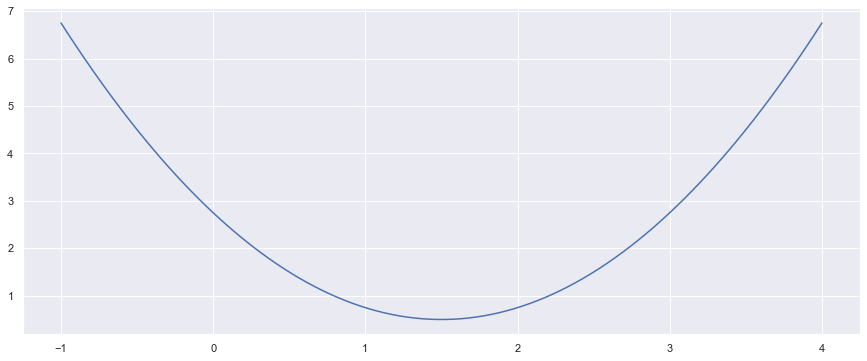

In [85]:
plt.plot(x, y)

In [86]:
sp.optimize.minimize(f, 5, method='SLSQP', options={'disp': True, 'maxiter': 10})

Optimization terminated successfully    (Exit mode 0)
            Current function value: [0.5]
            Iterations: 2
            Function evaluations: 5
            Gradient evaluations: 2


     fun: array([0.5])
     jac: array([1.49011612e-08])
 message: 'Optimization terminated successfully'
    nfev: 5
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1.5])

## Polynomial

In [87]:
# Descending order of coefficient
np.polyval([.1, 1, 2], 45)

249.5

In [88]:
def error_poly(c, x, y):
    return np.sum((y - np.polyval(c, x)) ** 2)

In [89]:
poly = [.1, -1.5, 1]

In [90]:
x = np.arange(0, 15)

In [91]:
y = np.polyval(poly, x)

In [92]:
yr = y + .5* np.random.randn(len(y))

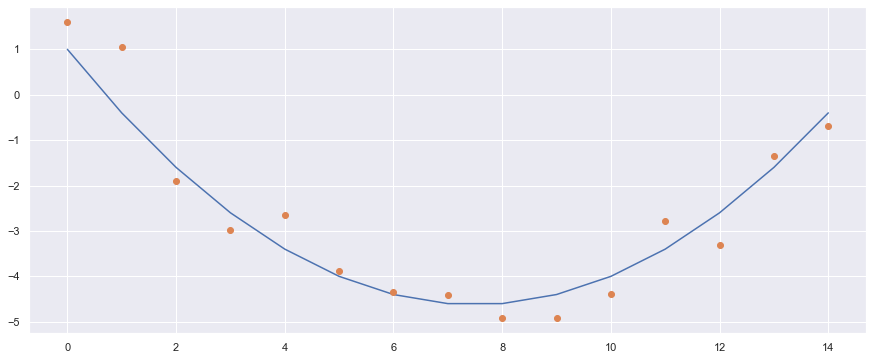

In [93]:
plt.plot(x, y, '-')
plt.plot(x, yr, 'o')

In [94]:
error_poly(poly, x, y)

0.0

In [95]:
error_poly(poly, x, yr)

4.8739506843332

In [96]:
res = sp.optimize.minimize(error_poly, np.ones(3), args=(x, yr), method='SLSQP', options={'disp': True})
res.x

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.5109305190260645
            Iterations: 9
            Function evaluations: 44
            Gradient evaluations: 9


array([ 0.10859106, -1.6792115 ,  1.74886582])

## Polyfit

In [97]:
np.polyfit(x, y, 2)

array([ 0.1, -1.5,  1. ])

In [98]:
polyr = np.polyfit(x, yr, 2)
polyr

array([ 0.10859031, -1.67920124,  1.74884992])

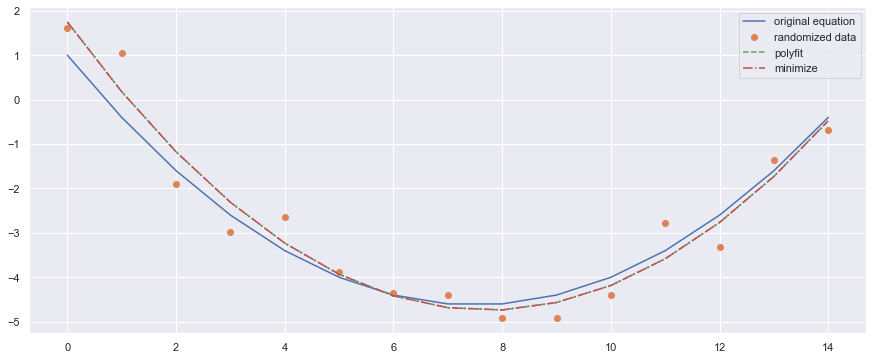

In [99]:
plt.plot(x, y, '-', label='original equation')
plt.plot(x, yr, 'o', label='randomized data')
plt.plot(x, np.polyval(polyr, x), '--', label='polyfit')
plt.plot(x, np.polyval(res.x, x), '-.', label='minimize')
plt.legend()

In [100]:
# Pretty close...
res.x - polyr

array([ 7.52683128e-07, -1.02639604e-05,  1.59017387e-05])

# Lesson 10

Portfolio optimizer